<a href="https://colab.research.google.com/github/kipsangchepesa/Core12_moduleII-IP/blob/main/Moringa_Data_Science_core12_ModuleII_W2_Independent_Project_2021_11_Kipsang_Nicholas_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Supervised Learning:*

*Hass Consulting Company Real Estate Analysis*.

#**1.Defining the question.**

The objective is to determine and analyse the factors affecting house prices. We will further predict the prices of houses considering factors provided in the data.
###**a.) Specifying the question.**

1. What are the factors affecting house pricing?
2. What greately influences the house pricing ?
3. What is the approximate cost of houses given several properties eg: bedrooms,bathrooms,area,Number of floors,renovation, presence of a water front etc

###**b.) Defining the metric of success**

What will determine my successs is establishing the factors affecting house prices and how house prices are being affected.
* This will be helpful in advising the company what factor needs more resources put to it and what are some of the improvements that can be done in ensuring that the company is at the top of the game when it comes to real estate.
* Determining the approximate price of the housing is paramount in ensuring we attract tenants with highly competitive yet fair prices while ensuring a good return on investment.

##**c.) Recording the experimental design**

* The experimental design involves viewing the data and ensuring its fitness for study while performing validation on it to ensure correctness and repeatability of the analysis.
* Performing a comprehensive study of the structure of the dataset while providing observation from every outcome of my analysis.
* Checking for anomalies,missing values and ilegitimate values inside the and dealing with them to ensure completeness and uniformity in the data.
* Creating a supervised model whole sole aim is to provide accurate and precise predictions of housing prices.
* Evaluating and cross checking the model against various optimization techniques to mark it as a suitable yet accurate predictor and solver of our problem.

##**d.) Data Relevance**

As stated above the data contains properties within the real estate context that will be relevant in our analysis ie.bedrooms,bathrooms,area,Number of floors,renovation, presence of a water front etc.

##**2. Reading the data.**

Importing all the necessary libraries

In [100]:
#Importing libraries
import pandas as pd 
import numpy as np #library for working with numbers  
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization 
# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# importing library warning that has a function to diable warnings
#with an argument ignore to such that warning will be ignored
import warnings
warnings.filterwarnings("ignore")


In [101]:
#user define function to read data from a csv url
def DataFrame(data):
  df=pd.read_csv(data)
  return df
  


In [91]:
#loading the dataset using our user define function and assigning it to housing which is the name of our dataset.
#this is achieved by passing url=('http://bit.ly/IndependentProjectWeek7Dataset') to our dataset in the DataFrame()
housing=DataFrame('http://bit.ly/IndependentProjectWeek7Dataset')
housing

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


##**3. Checking the data.**

In [92]:
#Info() prints the column header and the data type stored in each column
#useful when you are trying to understand what values need to 
#change types in order to apply functions to them
housing .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [93]:
#Shape() gives the size of the dataframe in the format (‘row’ x ‘column’)
housing.shape

(21613, 20)

In [94]:
#Describe() gives the mean, median, standard deviation and 
#percentiles of all the numerical values in your dataset. 
#before using describe make sure all the numerical values are stored as integers or floats
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [95]:
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [96]:
#Unique() allows you to look at the unique values in each column. 
#This is particularly useful when you have categorical data 
#and you want to understand the categories.
housing['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [97]:
housing['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [98]:
housing['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [99]:
#to get the number of houses built at the certain year
housing.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

##**4.External Data Source Validation**

##**5.Cleaning the dataset**

Dropping columns which are not useful such as **id, zipcode, sqft_living15, qft_lot15, lat and  long**

In [102]:
housing1=housing.drop(columns=['id','zipcode','sqft_living15','sqft_lot15','lat','long'])
housing1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


In [103]:
#dealing with years such that there are no outliers 
# I want to see the age of the houses from the year of building till the  most current year of data collection which is 2015
housing1['age_built']=housing1['yr_built'].apply(lambda x:2015-x)
# Getting the age from renovation. It could be an important factor in my analysis
housing1['age_renovated']=housing1['yr_renovated'].apply(lambda x:0 if x==0 else 2015-x)

####checking for missing values

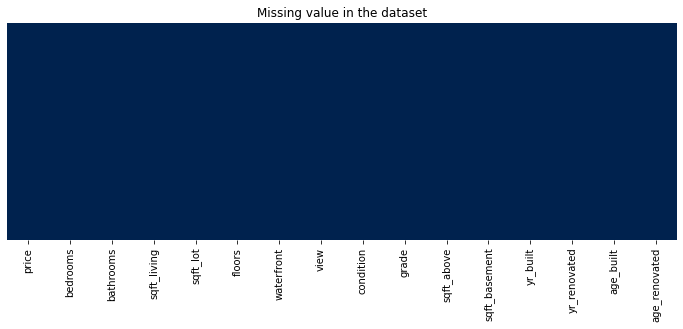

In [104]:
# Checking for missing values
plt.figure(figsize=(12,4))
sns.heatmap(housing1.isnull(),cbar=False,cmap='cividis',yticklabels=False)
plt.title('Missing value in the dataset');




There are no missing values 

####Detecting outliers using boxplot

<function matplotlib.pyplot.show>

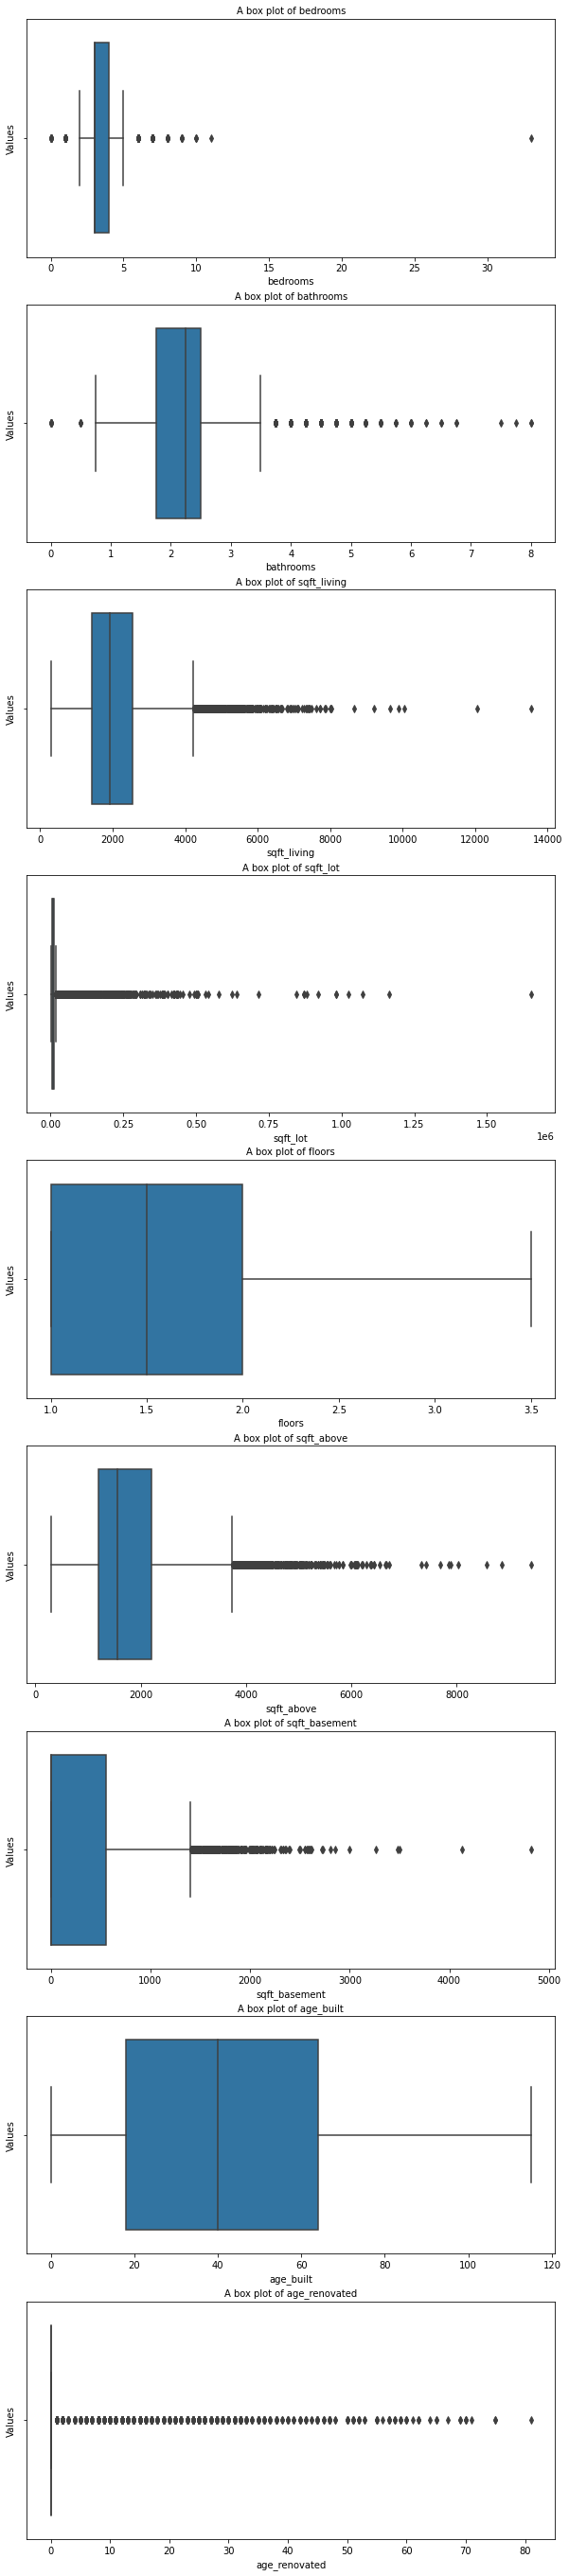

In [105]:
# Checking for outliers
cols=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','age_built','age_renovated']
fig,ax=plt.subplots(len(cols),figsize=(10,49))
for i,col_vals in enumerate(cols):
  sns.boxplot(x=housing1[col_vals],ax=ax[i])
  ax[i].set_title('A box plot of '+format(col_vals),fontsize=10)
  ax[i].set_ylabel('Values')
plt.show

Dropping year renovated and year built 

In [108]:
#housing1.head()
housing1=housing1.drop(columns=['yr_built','yr_renovated'],axis=1)
housing1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age_built,age_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,24
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,6,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,6,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,11,0
